Creación de un Conjunto de Datos con Variables Independientes y Dependientes:

In [1]:
import numpy as np
horas_estudio = np.array([2, 3, 4, 5, 6])
calificacion_examen = np.array([65, 70, 75, 80, 85])

Cálculo de la Correlación entre Variables Independientes y Dependientes:

In [2]:
def calcular_correlacion(x, y):
    correlacion = np.corrcoef(x, y)[0, 1]
    return correlacion
correlacion = calcular_correlacion(horas_estudio, calificacion_examen)
print("La correlación entre horas de estudio y calificación del examen es:", correlacion)


La correlación entre horas de estudio y calificación del examen es: 1.0


Graficar un Gráfico de Dispersión de los Datos:

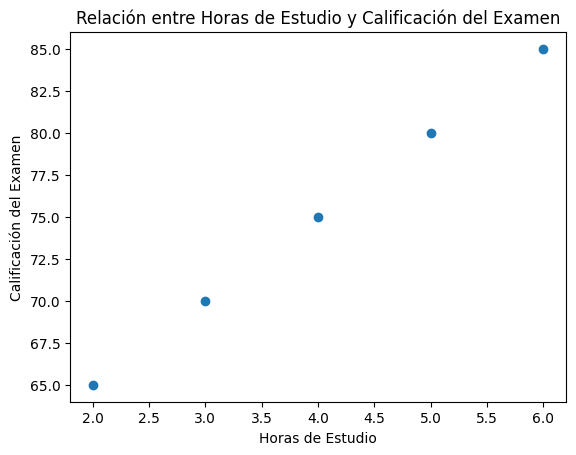

In [3]:
import matplotlib.pyplot as plt

plt.scatter(horas_estudio, calificacion_examen)
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación del Examen')
plt.title('Relación entre Horas de Estudio y Calificación del Examen')
plt.show()


Ajustar un Modelo de Regresión Lineal y Visualizar la Línea de Regresión:


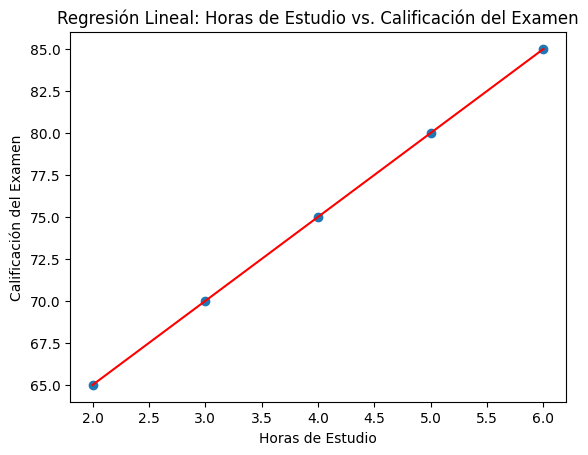

In [4]:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(horas_estudio.reshape(-1, 1), calificacion_examen)

plt.scatter(horas_estudio, calificacion_examen)
plt.plot(horas_estudio, modelo_regresion.predict(horas_estudio.reshape(-1, 1)), color='red')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación del Examen')
plt.title('Regresión Lineal: Horas de Estudio vs. Calificación del Examen')
plt.show()


Modelo Lineal y Aplicación en la Predicción:

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 3  # Generar y = 3X + ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 8.25977922274286


Método de Mínimos Cuadrados:


In [6]:
# Definir la función para el método de mínimos cuadrados
def least_squares(X, y):
	X = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar columna de unos para el término de intercepción
	coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
	return coefficients

# Usar la función para ajustar un modelo
coefficients = least_squares(X, y)


Interpretación de la Pendiente y la Intersección:

Intersección: 0.6190205661343011
Coeficientes de la pendiente: [2.99415546]


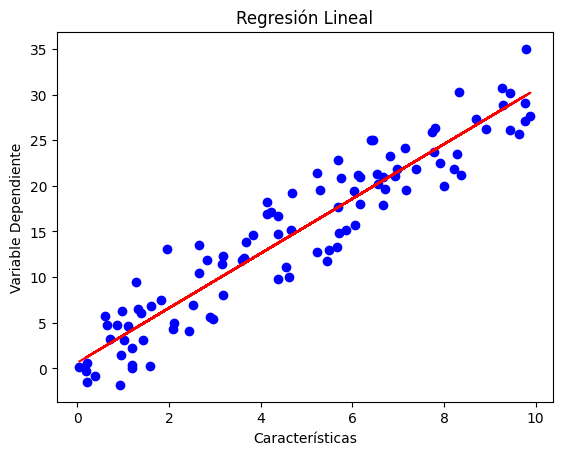

In [7]:
# Extraer los coeficientes de la pendiente e intersección del modelo de Regresión Lineal
intercept = model.intercept_
coefficients = model.coef_
print("Intersección:", intercept)
print("Coeficientes de la pendiente:", coefficients)

# Graficar la línea de regresión
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')  # Línea de regresión
plt.xlabel('Características')
plt.ylabel('Variable Dependiente')
plt.title('Regresión Lineal')
plt.show()


Regresión Polinomial:


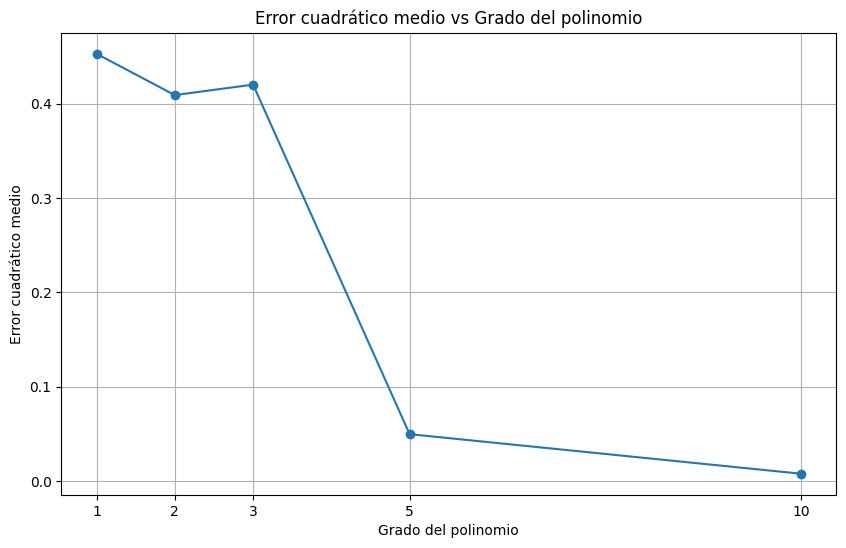

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos ficticios
np.random.seed(0)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Generar una función sinusoidal con ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
degrees = [1, 2, 3, 5, 10]
mse_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, y_train)

	y_pred = model.predict(X_test_poly)
	mse = mean_squared_error(y_test, y_pred)
	mse_list.append(mse)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker='o')
plt.title('Error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()


Regresión Logarítmica:
Generación de datos artificiales.


In [9]:
import numpy as np

# Generar datos ficticios con una relación logarítmica creciente
np.random.seed(0)
X = np.linspace(1, 10, 100)
y = 2 * np.log(X) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano


Aplicación de Regresión Logarítmica:


In [10]:
from scipy.optimize import curve_fit

def logarithmic_function(x, a, b):
	return a * np.log(x) + b

# Ajustar la curva logarítmica a los datos
params, _ = curve_fit(logarithmic_function, X, y)
a, b = params


Interpretación de los coeficientes:


In [11]:
print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)
print("Interpretación:")
print("El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.")
print("El coeficiente 'b' representa el intercepto de la curva logarítmica.")


Coeficiente 'a': 1.9380668967409198
Coeficiente 'b': 0.10822350530434788
Interpretación:
El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.
El coeficiente 'b' representa el intercepto de la curva logarítmica.


Ejemplos de aplicación en economía y biología:
Ejemplo de aplicación en economía:


In [12]:
# Generar datos ficticios para el crecimiento del PIB en función del tiempo
X_economy = np.linspace(1, 10, 100)
y_economy = 3 * np.log(X_economy) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano
# Aplicar el mismo procedimiento de ajuste de curva logarítmica
params_economy, _ = curve_fit(logarithmic_function, X_economy, y_economy)

a, b = params_economy

print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)
print("La ecuación es: Y = ", a, "log(X) + ", b)
print("Interpretación:")
print("El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.")
print("El coeficiente 'b' representa el intercepto de la curva logarítmica.")

Coeficiente 'a': 2.94003426728647
Coeficiente 'b': 0.10960663550228766
La ecuación es: Y =  2.94003426728647 log(X) +  0.10960663550228766
Interpretación:
El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.
El coeficiente 'b' representa el intercepto de la curva logarítmica.


Ejemplo de aplicación en biología:


In [13]:
# Generar datos ficticios para el crecimiento de una población de organismos en función del tiempo
X_biology = np.linspace(1, 10, 100)
y_biology = 2 * np.log(X_biology) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano
# Aplicar el mismo procedimiento de ajuste de curva logarítmica
params_biology, _ = curve_fit(logarithmic_function, X_biology, y_biology)

a, b = params_biology

print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)
print("La ecuación es: Y = ", a, "log(X) + ", b)
print("Interpretación:")
print("El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.")
print("El coeficiente 'b' representa el intercepto de la curva logarítmica.")


Coeficiente 'a': 2.0123680808955973
Coeficiente 'b': -0.03107001605863946
La ecuación es: Y =  2.0123680808955973 log(X) +  -0.03107001605863946
Interpretación:
El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.
El coeficiente 'b' representa el intercepto de la curva logarítmica.


Regresión Logística:

Implementación de Regresión Logística desde Cero


In [14]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Cálculo del gradiente
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Actualización de parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)


Prueba de la Implementación de Regresión Logística


In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred = model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)


Precisión del modelo de regresión logística: 0.865


Comparación con Sklearn


In [16]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

# Crear y entrenar modelo de regresión logística de sklearn
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predecir en conjunto de prueba
sklearn_y_pred = sklearn_model.predict(X_test)

# Calcular precisión
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("Precisión del modelo de regresión logística de sklearn:", sklearn_accuracy)


Precisión del modelo de regresión logística de sklearn: 0.88
